# Exploring the Factors Affecting Taxi Fares in New York City Using Data Science Techniques.

The dataset used in this project is related to taxi trips in New York City. The data was obtained from the New York City Taxi and Limousine Commission (TLC) and includes information on taxi trips taken during 2013. The dataset is composed of approximately 12 million records, each representing a taxi trip and includes features such as pickup and dropoff location, pickup and dropoff time, trip distance, fare amount, payment type, and several other variables. The dataset provides a rich source of information on taxi trips in New York City and can be used for a variety of applications such as predicting taxi fares, understanding travel patterns, and optimizing transportation services.

## Importing Library's

In [1]:
import  numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
taxi = pd.read_csv('taxi.csv')

In [3]:
taxi

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,22.43,1,N,1,59.5,0.5,0.5,10.00,5.76,0.3,76.56,132,259,2018,5,23,2,23,2998.0,29.76
34996,9.16,1,N,1,30.0,0.0,0.5,6.58,5.76,0.3,43.14,24,138,2018,4,4,2,9,1419.0,29.15
34997,6.78,1,N,1,23.0,0.0,0.5,5.95,0.00,0.3,29.75,140,231,2018,3,7,2,8,2459.0,42.67
34998,0.26,1,N,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80,142,142,2018,4,18,2,8,1932.0,26.73


In [4]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            35000 non-null  float64
 1   rate_code                35000 non-null  int64  
 2   store_and_fwd_flag       35000 non-null  object 
 3   payment_type             35000 non-null  int64  
 4   fare_amount              35000 non-null  float64
 5   extra                    35000 non-null  float64
 6   mta_tax                  35000 non-null  float64
 7   tip_amount               35000 non-null  float64
 8   tolls_amount             35000 non-null  float64
 9   imp_surcharge            35000 non-null  float64
 10  total_amount             35000 non-null  float64
 11  pickup_location_id       35000 non-null  int64  
 12  dropoff_location_id      35000 non-null  int64  
 13  year                     35000 non-null  int64  
 14  month                 

In [5]:
taxi.duplicated().sum()  # checking duplicates

0

In [6]:
taxi.isnull().sum() # checking null values from each column

trip_distance              0
rate_code                  0
store_and_fwd_flag         0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
imp_surcharge              0
total_amount               0
pickup_location_id         0
dropoff_location_id        0
year                       0
month                      0
day                        0
day_of_week                0
hour_of_day                0
trip_duration              0
calculated_total_amount    0
dtype: int64

In [7]:
taxi.describe() # dataset describe in statistics method

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,35000.00000,35000.000000
mean,9.088815,1.110086,1.123400,31.920911,0.320337,0.486929,6.142190,2.262871,0.299940,41.442469,152.543943,146.852200,2018.0,6.132429,15.337743,2.885200,13.803657,2257.38360,41.324249
std,4.496854,0.581456,0.350842,14.689516,0.402590,0.079781,4.397599,3.578315,0.004242,19.241543,59.764598,76.373292,0.0,3.342088,8.691250,1.926999,6.224485,5112.41526,19.167043
min,0.010000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,1.00000,0.310000
25%,6.470000,1.000000,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,132.000000,87.000000,2018.0,3.000000,7.000000,1.000000,10.000000,1448.00000,30.300000
50%,8.700000,1.000000,1.000000,29.000000,0.000000,0.500000,6.050000,0.000000,0.300000,38.470000,138.000000,141.000000,2018.0,6.000000,16.000000,3.000000,14.000000,1862.00000,38.460000
75%,10.990000,1.000000,1.000000,36.000000,0.500000,0.500000,8.100000,5.760000,0.300000,48.352500,186.000000,229.000000,2018.0,9.000000,23.000000,4.000000,19.000000,2340.00000,48.200000
max,79.010000,5.000000,4.000000,400.000000,18.500000,0.500000,215.000000,189.500000,0.300000,468.350000,265.000000,265.000000,2018.0,12.000000,31.000000,6.000000,23.000000,86347.00000,468.350000


In [8]:
taxi.nunique() # checking the continuous and category columns

trip_distance              2317
rate_code                     5
store_and_fwd_flag            2
payment_type                  4
fare_amount                 360
extra                         7
mta_tax                       2
tip_amount                 1406
tolls_amount                177
imp_surcharge                 2
total_amount               2692
pickup_location_id          216
dropoff_location_id         253
year                          1
month                        12
day                          31
day_of_week                   7
hour_of_day                  24
trip_duration              3913
calculated_total_amount    2678
dtype: int64

## EDA

In [9]:
taxi.drop(['pickup_location_id','dropoff_location_id','year'],axis=1,inplace=True) #removeing columns which is unwanted

In [10]:
taxi['store_and_fwd_flag']=taxi['store_and_fwd_flag'].astype('category').cat.codes #values changing strings into int
taxi['trip_distance']=taxi['trip_distance']*1.6093
taxi['trip_duration']=taxi['trip_duration']/60    # distance (miles) into kilometer and duration (hours) into minutes
taxi=taxi.rename(columns={'trip_distance':'trip_distance(km)','trip_duration':'trip_duration(minutes)'}) #re nameing columns

In [11]:
percentages = [0, 0.25, 0.5, 0.75,0.76,0.8, 0.9,0.95,0.98,0.99,1]
taxi.describe(percentiles=percentages) # cheacking values at particular percentage 

,trip_distance(km),rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration(minutes),calculated_total_amount
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,14.626629,1.110086,0.005057,1.123400,31.920911,0.320337,0.486929,6.142190,2.262871,0.299940,41.442469,6.132429,15.337743,2.885200,13.803657,37.623060,41.324249
std,7.236787,0.581456,0.070935,0.350842,14.689516,0.402590,0.079781,4.397599,3.578315,0.004242,19.241543,3.342088,8.691250,1.926999,6.224485,85.206921,19.167043
min,0.016093,1.000000,0.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,1.000000,0.000000,0.000000,0.016667,0.310000
0%,0.016093,1.000000,0.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,1.000000,0.000000,0.000000,0.016667,0.310000
25%,10.412171,1.000000,0.000000,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,3.000000,7.000000,1.000000,10.000000,24.133333,30.300000
50%,14.000910,1.000000,0.000000,1.000000,29.000000,0.000000,0.500000,6.050000,0.000000,0.300000,38.470000,6.000000,16.000000,3.000000,14.000000,31.033333,38.460000
75%,17.686207,1.000000,0.000000,1.000000,36.000000,0.500000,0.500000,8.100000,5.760000,0.300000,48.352500,9.000000,23.000000,4.000000,19.000000,39.000000,48.200000
76%,17.863230,1.000000,0.000000,1.000000,36.500000,0.500000,0.500000,8.200000,5.760000,0.300000,48.820000,9.000000,24.000000,5.000000,19.000000,39.416667,48.800000
80%,18.667880,1.000000,0.000000,1.000000,38.000000,0.500000,0.500000,8.650000,5.760000,0.300000,50.800000,10.000000,25.000000,5.000000,20.000000,41.333333,50.760000


In [12]:
taxi['fare_amount'].nlargest(5) #highest paid amounts 

7012     400.0
26895    350.5
15154    350.0
19542    300.0
21959    270.0
Name: fare_amount, dtype: float64

In [13]:
taxi

,trip_distance(km),rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration(minutes),calculated_total_amount
0,14.499793,1,0,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,3,7,2,6,35.516667,24.30
1,0.321860,1,0,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,2,25,6,10,39.616667,37.40
2,15.529745,1,0,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,1,29,0,8,21.433333,30.36
3,15.288350,1,0,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,9,25,1,20,43.100000,4.30
4,9.333940,1,0,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,8,20,0,21,26.250000,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,36.096599,1,0,1,59.5,0.5,0.5,10.00,5.76,0.3,76.56,5,23,2,23,49.966667,29.76
34996,14.741188,1,0,1,30.0,0.0,0.5,6.58,5.76,0.3,43.14,4,4,2,9,23.650000,29.15
34997,10.911054,1,0,1,23.0,0.0,0.5,5.95,0.00,0.3,29.75,3,7,2,8,40.983333,42.67
34998,0.418418,1,0,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80,4,18,2,8,32.200000,26.73


In [14]:
quantile_vals = taxi.quantile(0.95)
mask = taxi[taxi > quantile_vals]
result = taxi.loc[mask.all(axis=1)] #finding outlier 

In [15]:
mask 

,trip_distance(km),rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration(minutes),calculated_total_amount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,36.096599,NaN,NaN,NaN,59.5,NaN,NaN,NaN,NaN,NaN,76.56,NaN,NaN,NaN,NaN,NaN,NaN
34996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
result

,trip_distance(km),rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration(minutes),calculated_total_amount
0,14.499793,1,0,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,3,7,2,6,35.516667,24.30
1,0.321860,1,0,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,2,25,6,10,39.616667,37.40
2,15.529745,1,0,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,1,29,0,8,21.433333,30.36
3,15.288350,1,0,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,9,25,1,20,43.100000,4.30
4,9.333940,1,0,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,8,20,0,21,26.250000,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,36.096599,1,0,1,59.5,0.5,0.5,10.00,5.76,0.3,76.56,5,23,2,23,49.966667,29.76
34996,14.741188,1,0,1,30.0,0.0,0.5,6.58,5.76,0.3,43.14,4,4,2,9,23.650000,29.15
34997,10.911054,1,0,1,23.0,0.0,0.5,5.95,0.00,0.3,29.75,3,7,2,8,40.983333,42.67
34998,0.418418,1,0,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80,4,18,2,8,32.200000,26.73


In [17]:
threshold = 0.75
filtered_mask = mask[mask > mask.max() * threshold].dropna(how='all')

In [18]:
filtered_mask

,trip_distance(km),rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration(minutes),calculated_total_amount
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34970,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN
34976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN
34987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN


In [19]:
filtered_mask.describe()

,trip_distance(km),rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration(minutes),calculated_total_amount
count,7.000000,683.000000,177.0,43.0,3.000000,3.000000,0.0,1.0,1.0,0.0,5.000000,1660.0,987.000000,0.0,0.0,126.000000,5.000000
mean,117.361651,4.733529,1.0,4.0,366.833333,17.833333,NaN,215.0,189.5,NaN,418.072000,12.0,30.300912,NaN,NaN,1408.587831,395.826000
std,8.564978,0.442438,0.0,0.0,28.724264,0.577350,NaN,NaN,NaN,NaN,46.487264,0.0,0.458887,NaN,NaN,49.690617,44.170661
min,104.765430,4.000000,1.0,4.0,350.000000,17.500000,NaN,215.0,189.5,NaN,358.560000,12.0,30.000000,NaN,NaN,1096.333333,358.560000
25%,112.168210,4.000000,1.0,4.0,350.250000,17.500000,NaN,215.0,189.5,NaN,400.300000,12.0,30.000000,NaN,NaN,1405.975000,362.800000
50%,118.251364,5.000000,1.0,4.0,350.500000,17.500000,NaN,215.0,189.5,NaN,400.800000,12.0,30.000000,NaN,NaN,1418.966667,389.120000
75%,123.513775,5.000000,1.0,4.0,375.250000,18.000000,NaN,215.0,189.5,NaN,462.350000,12.0,31.000000,NaN,NaN,1431.966667,400.300000
max,127.150793,5.000000,1.0,4.0,400.000000,18.500000,NaN,215.0,189.5,NaN,468.350000,12.0,31.000000,NaN,NaN,1439.116667,468.350000


In [20]:
taxi.drop(filtered_mask.index,inplace=True) #removing outliers from dataset

In [21]:
taxi.shape

(31444, 17)

In [22]:
taxi.describe()

,trip_distance(km),rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration(minutes),calculated_total_amount
count,31444.000000,31444.000000,31444.0,31444.000000,31444.000000,31444.000000,31444.000000,31444.000000,31444.000000,31444.000000,31444.000000,31444.000000,31444.000000,31444.000000,31444.000000,31444.000000,31444.000000
mean,14.474895,1.038418,0.0,1.107270,31.065147,0.324746,0.490380,6.146801,2.221782,0.299971,40.558238,5.771435,14.979042,2.868528,13.870182,32.592322,41.363772
std,6.527335,0.274405,0.0,0.319673,11.409093,0.369237,0.068686,3.845937,3.331470,0.002930,15.697503,3.134510,8.523652,1.928372,6.210776,20.281851,18.754714
min,0.016093,1.000000,0.0,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000,1.000000,1.000000,0.000000,0.000000,0.016667,0.310000
25%,10.460450,1.000000,0.0,1.000000,24.000000,0.000000,0.500000,4.560000,0.000000,0.300000,30.350000,3.000000,7.000000,1.000000,10.000000,24.095833,30.350000
50%,14.017003,1.000000,0.0,1.000000,29.000000,0.000000,0.500000,6.080000,0.000000,0.300000,38.460000,5.000000,15.000000,3.000000,14.000000,30.950000,38.470000
75%,17.541370,1.000000,0.0,1.000000,35.500000,0.500000,0.500000,8.060000,5.760000,0.300000,48.060000,9.000000,23.000000,4.000000,19.000000,38.866667,48.300000
max,63.245490,3.000000,0.0,3.000000,116.500000,1.500000,0.500000,116.200000,57.600000,0.300000,209.070000,11.000000,29.000000,6.000000,23.000000,1062.300000,315.380000


In [23]:
print(taxi.columns)

Index(['trip_distance(km)', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration(minutes)', 'calculated_total_amount'],
      dtype='object')


In [24]:
taxicolumns=taxi[['rate_code','store_and_fwd_flag','payment_type','extra','mta_tax','imp_surcharge','month','day','day_of_week', 'hour_of_day']]

In [1]:
taxi['payment_type'].unique()

NameError: name 'taxi' is not defined

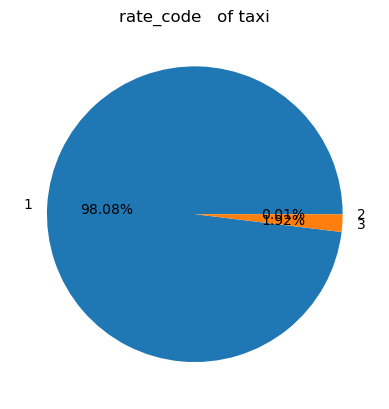

inferences of rate_code -
count  of rate_code highest values are-
        rate_code
1      30839  
count of rate_code lowest values are-
     rate_code
2          2


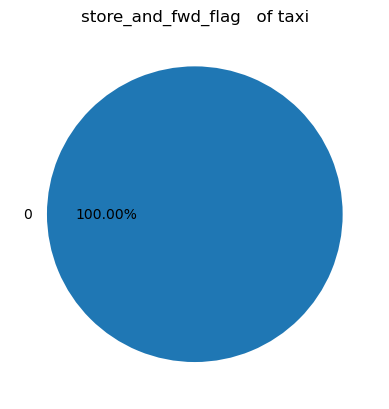

inferences of store_and_fwd_flag -
count  of store_and_fwd_flag highest values are-
        store_and_fwd_flag
0               31444  
count of store_and_fwd_flag lowest values are-
     store_and_fwd_flag
0               31444


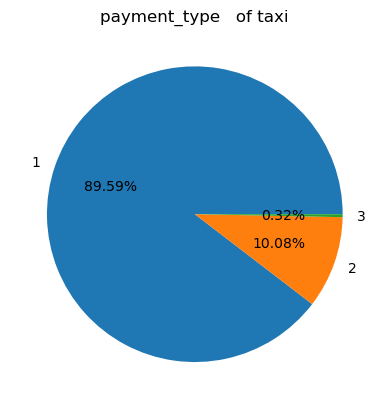

inferences of payment_type -
count  of payment_type highest values are-
        payment_type
1         28172  
count of payment_type lowest values are-
     payment_type
3           101


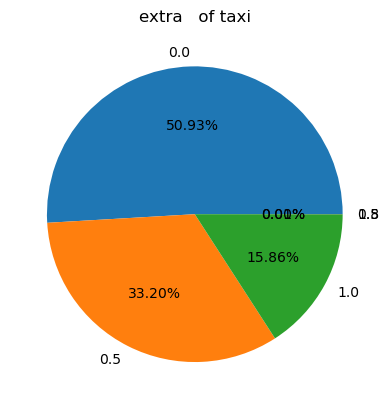

inferences of extra -
count  of extra highest values are-
          extra
0.0  16014  
count of extra lowest values are-
       extra
0.8      1


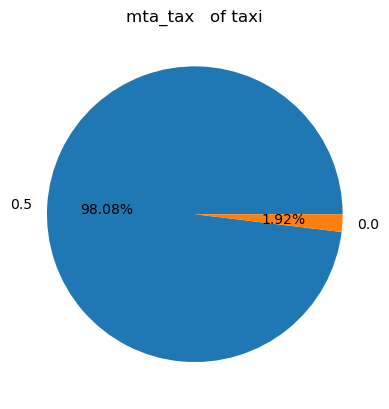

inferences of mta_tax -
count  of mta_tax highest values are-
          mta_tax
0.5    30839  
count of mta_tax lowest values are-
       mta_tax
0.0      605


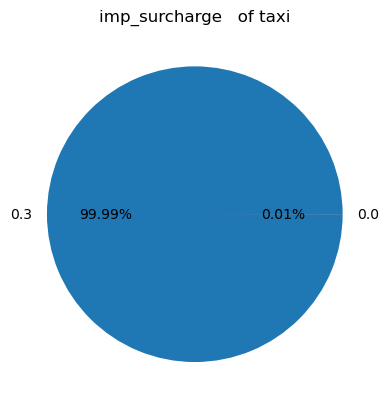

inferences of imp_surcharge -
count  of imp_surcharge highest values are-
          imp_surcharge
0.3          31441  
count of imp_surcharge lowest values are-
       imp_surcharge
0.0              3


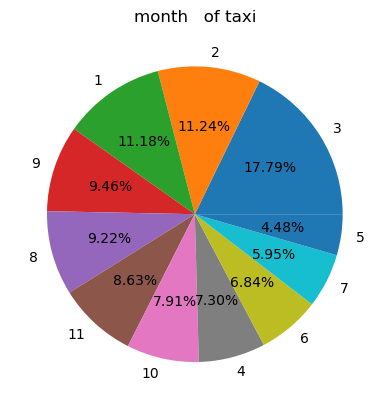

inferences of month -
count  of month highest values are-
        month
3   5594  
count of month lowest values are-
     month
7   1408


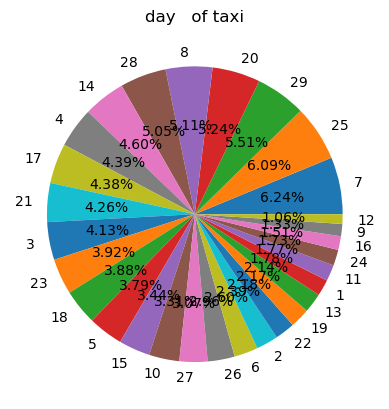

inferences of day -
count  of day highest values are-
         day
6  1961  
count of day lowest values are-
     day
1  332


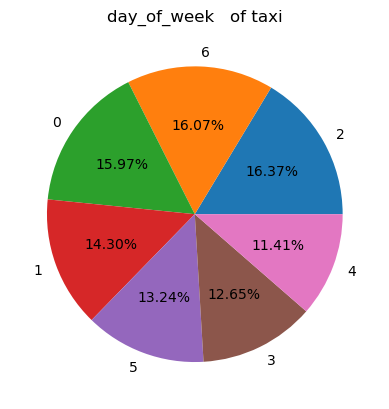

inferences of day_of_week -
count  of day_of_week highest values are-
        day_of_week
2         5146  
count of day_of_week lowest values are-
     day_of_week
5         3587


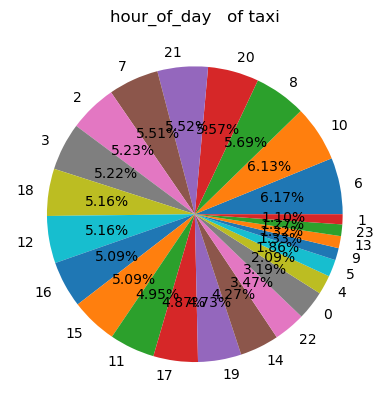

inferences of hour_of_day -
count  of hour_of_day highest values are-
         hour_of_day
21         1939  
count of hour_of_day lowest values are-
     hour_of_day
3          347


In [25]:
for col in taxicolumns:
    plot=plt.pie(taxi[col].value_counts(),autopct='%0.2f%%',labels=taxi[col].unique())
    plt.title(f'{col}   of taxi')
    plt.show()
    print(f'inferences of {col} -\ncount  of {col} highest values are-\n     {pd.DataFrame(taxi[col].value_counts().head(1))}  \ncount of {col} lowest values are-\n  {pd.DataFrame(taxi[col].value_counts().tail(1))}')
    
#By using for loops ➰ plotting pie plots of unique values counts from categorical columns


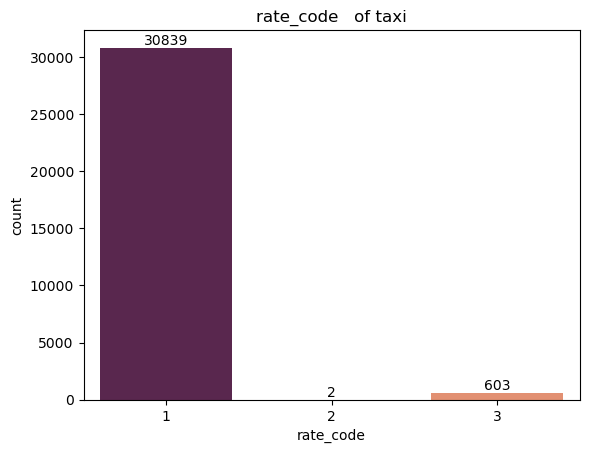

inferences of rate_code -
count  of rate_code highest values are-
        rate_code
1      30839  
count of rate_code lowest values are-
     rate_code
2          2


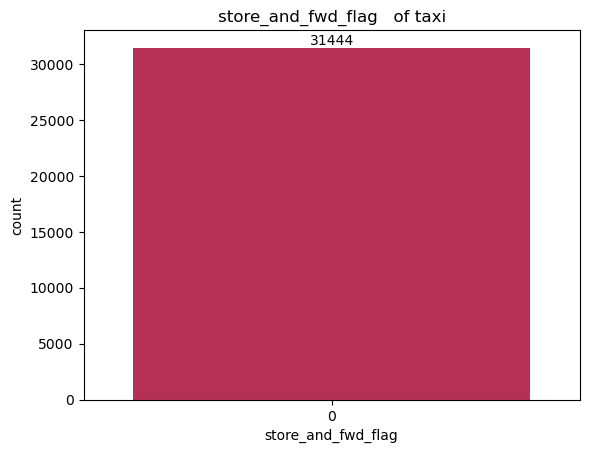

inferences of store_and_fwd_flag -
count  of store_and_fwd_flag highest values are-
        store_and_fwd_flag
0               31444  
count of store_and_fwd_flag lowest values are-
     store_and_fwd_flag
0               31444


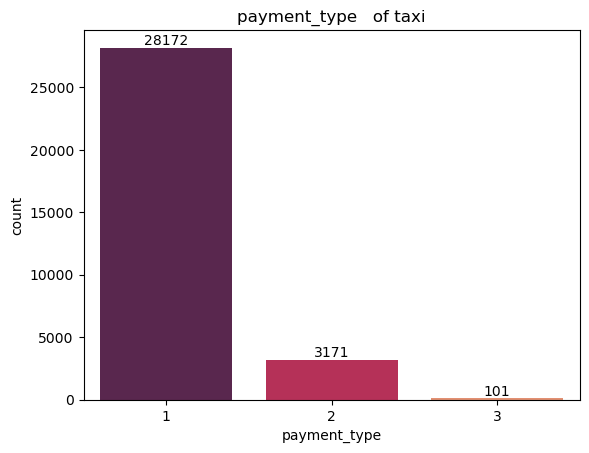

inferences of payment_type -
count  of payment_type highest values are-
        payment_type
1         28172  
count of payment_type lowest values are-
     payment_type
3           101


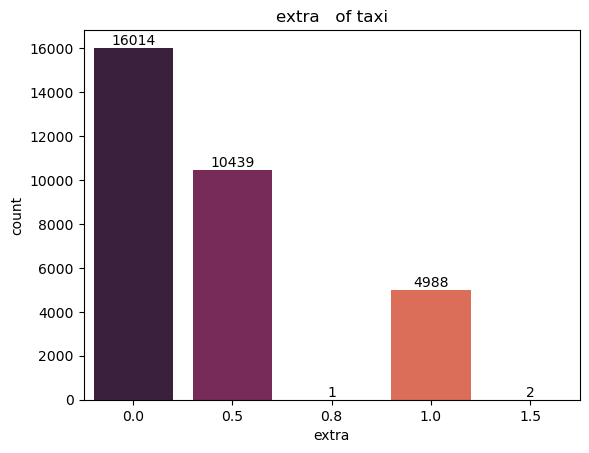

inferences of extra -
count  of extra highest values are-
          extra
0.0  16014  
count of extra lowest values are-
       extra
0.8      1


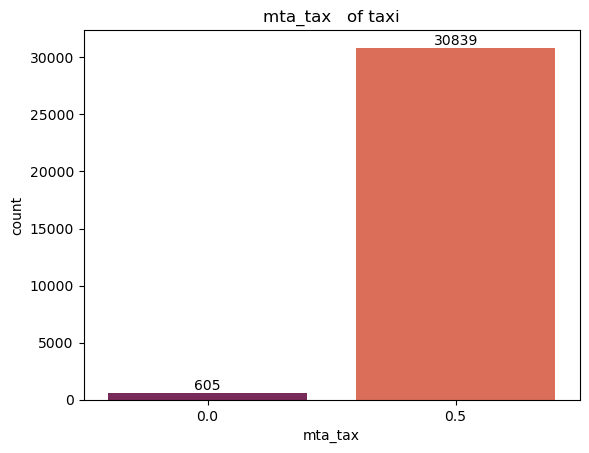

inferences of mta_tax -
count  of mta_tax highest values are-
          mta_tax
0.5    30839  
count of mta_tax lowest values are-
       mta_tax
0.0      605


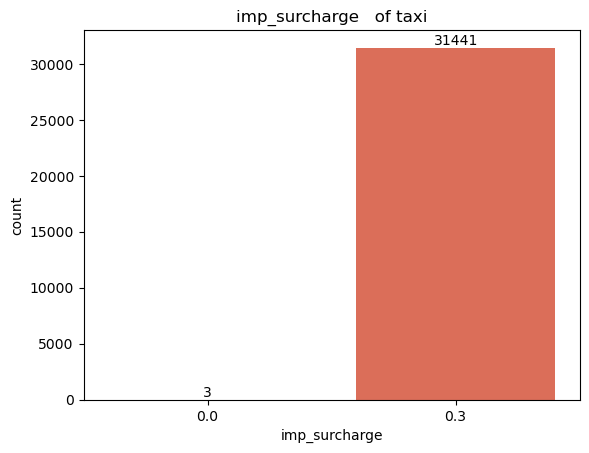

inferences of imp_surcharge -
count  of imp_surcharge highest values are-
          imp_surcharge
0.3          31441  
count of imp_surcharge lowest values are-
       imp_surcharge
0.0              3


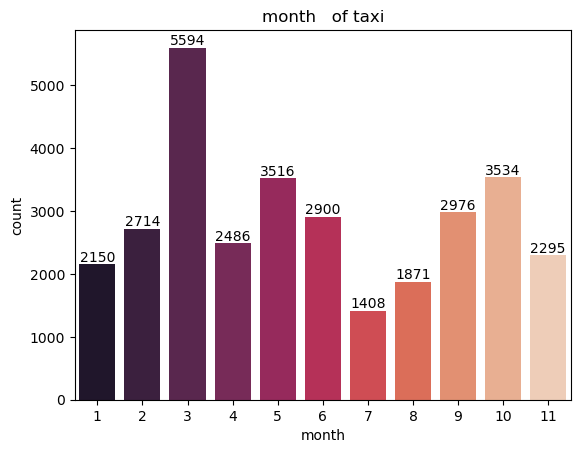

inferences of month -
count  of month highest values are-
        month
3   5594  
count of month lowest values are-
     month
7   1408


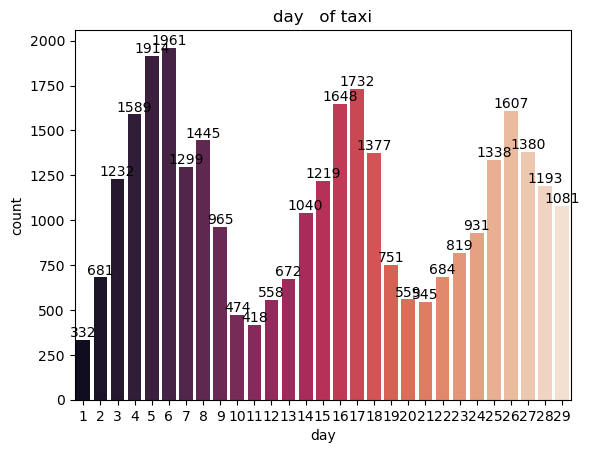

inferences of day -
count  of day highest values are-
         day
6  1961  
count of day lowest values are-
     day
1  332


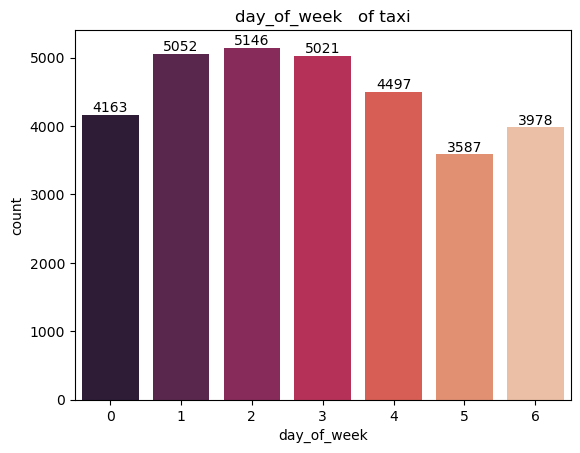

inferences of day_of_week -
count  of day_of_week highest values are-
        day_of_week
2         5146  
count of day_of_week lowest values are-
     day_of_week
5         3587


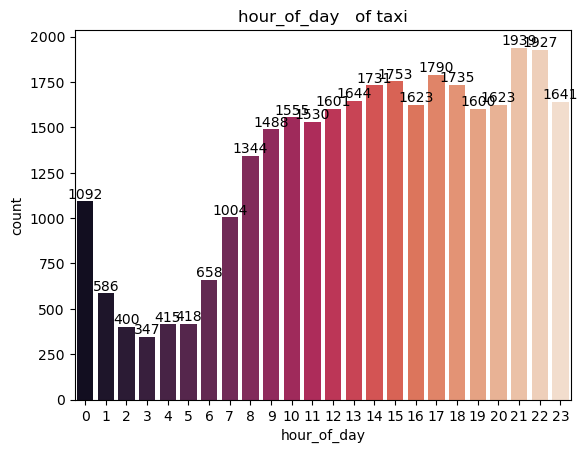

inferences of hour_of_day -
count  of hour_of_day highest values are-
         hour_of_day
21         1939  
count of hour_of_day lowest values are-
     hour_of_day
3          347


In [26]:
for col in taxicolumns:
    plot=sns.countplot(x=col,data=taxi,palette='rocket')
    plt.title(f'{col}   of taxi')
    plot.bar_label(plot.containers[0], label_type='edge', fontsize=10, padding=0)
    plt.show()
    print(f'inferences of {col} -\ncount  of {col} highest values are-\n     {pd.DataFrame(taxi[col].value_counts().head(1))}  \ncount of {col} lowest values are-\n  {pd.DataFrame(taxi[col].value_counts().tail(1))}')
    
#By using for loops ➰ plotting bar plot of unique values counts from categorical columns

# inferences-
1. The majority of trips have a rate code of 1, indicating a standard rate. Only a small number of trips have a rate code of 2, which represents a negotiated fare.
2. All trips in the dataset were flagged as not being stored and forwarded, indicating that they were processed in real-time by the taxi system.
3. The most common payment type is credit card, followed by cash and then no charge.
4. The majority of trips do not have an extra charge, with $0 being the most common extra amount.
5. The MTA tax of $0.50 is applied to the majority of trips, with only a small number of trips having no MTA tax.
6. Most trips have no improvement surcharge, although some have a surcharge of $0.30.
7. March has the highest number of taxi trips, while July has the lowest.
8. The 6th of the month has the highest number of taxi trips, while the 1st has the lowest.
9. Tuesday is the day of the week with the most taxi trips, while Saturday has the fewest.
10. The highest number of taxi trips occur at 9pm, while the lowest occur at 3am.


rate_code:

            The most frequent rate code used is 1, which indicates that this is the standard rate.

            There are only 3 trips with rate code 2, which is the lowest count for any rate code.


store_and_fwd_flag:

            The majority of trips do not have this flag set, indicating that the trip data was not held in the vehicle's 
              memory  before being forwarded to the server.

            Only a small number of trips have this flag set to 1.


payment_type: 

            The most common payment type is 1, which is credit card payment.

            There are only 43 trips where payment was made using payment type 4, which is the lowest count for any payment 
            type.


extra:

            The majority of trips do not have any extra charges. 

            The lowest count of any extra value is 1, which corresponds to an extra charge of 0.8.


mta_tax:

            The majority of trips have an MTA tax of 0.5, which is the standard tax rate.

            Only 915 trips have an MTA tax of 0, which is the lowest count for any MTA tax value.


imp_surcharge: 

            The majority of trips have an improvement surcharge of 0.3.

            Only 7 trips have an improvement surcharge of 0, which is the lowest count for any surcharge value.


month: 

            The month with the highest number of trips is March, with 5786 trips. 

            July has the lowest count of any month with only 1623 trips.


day:

            The day with the highest number of trips is the 6th, with 2010 trips.

            The 31st has the lowest count of any day with only 297 trips.


day_of_week:


            The day of the week with the highest number of trips is Thursday (day 3), 


            with 5584 trips. Saturday (day 5) has the lowest count of any day of the week with only 4036 trips.


hour_of_day: 

            The hour of the day with the highest number of trips is 21:00, with 2134 trips. 

            03:00 has the lowest count of any hour of the day with only 388 trips.






In [27]:
taxi.drop('store_and_fwd_flag',axis=1,inplace=True)

trip_distance(km)  is 2139 continues values in column
Columns with highest average fares: 
       trip_distance(km)  fare_amount
2137          61.571818        116.5
2135          59.045217        116.0
2136          59.447542        115.5
1963          36.820784        115.0
2123          52.479273        113.5 
 Columns with lowest average fares:
     trip_distance(km)  fare_amount
4            0.080465     2.650000
43           1.287440     2.625000
3            0.064372     2.583333
2            0.048279     2.583333
0            0.016093     2.555556


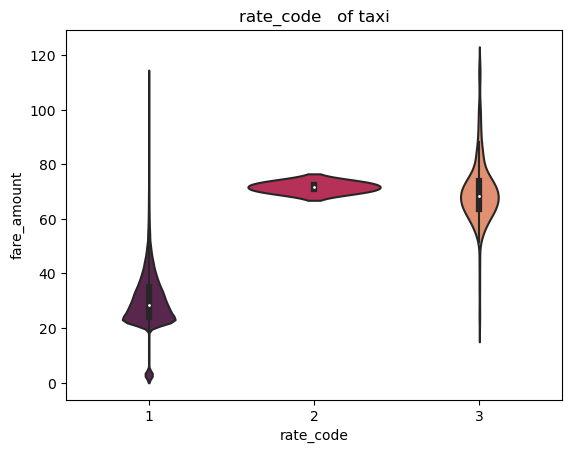

Columns with highest average fares: 
    rate_code  fare_amount
1          2    71.660000
2          3    69.843284
0          1    30.304279 
 Columns with lowest average fares:
    rate_code  fare_amount
1          2    71.660000
2          3    69.843284
0          1    30.304279


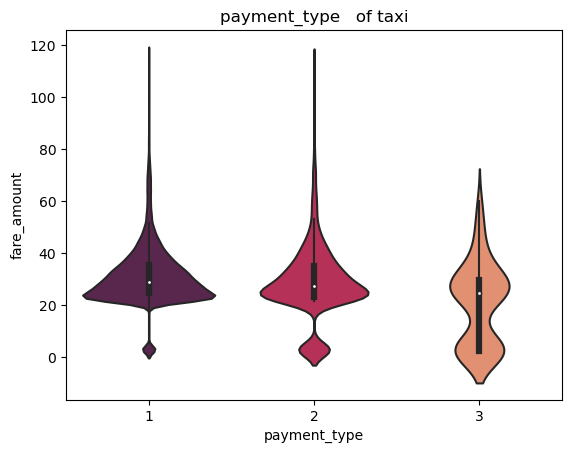

Columns with highest average fares: 
    payment_type  fare_amount
0             1    31.329120
1             2    29.046515
2             3    20.811881 
 Columns with lowest average fares:
    payment_type  fare_amount
0             1    31.329120
1             2    29.046515
2             3    20.811881
fare_amount  is 172 continues values in column


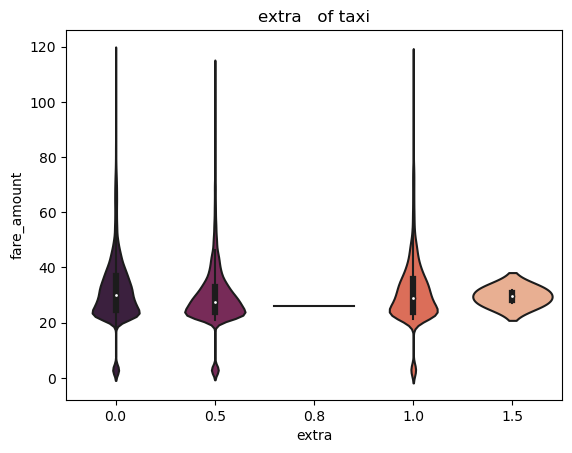

Columns with highest average fares: 
    extra  fare_amount
0    0.0    31.963273
3    1.0    31.441560
1    0.5    29.508299
4    1.5    29.500000
2    0.8    26.000000 
 Columns with lowest average fares:
    extra  fare_amount
0    0.0    31.963273
3    1.0    31.441560
1    0.5    29.508299
4    1.5    29.500000
2    0.8    26.000000


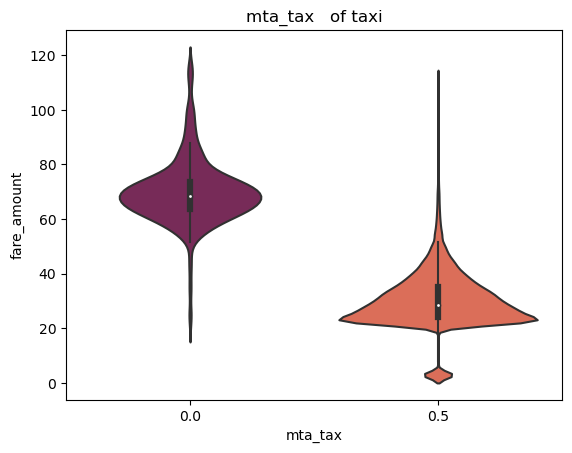

Columns with highest average fares: 
    mta_tax  fare_amount
0      0.0    69.849289
1      0.5    30.304279 
 Columns with lowest average fares:
    mta_tax  fare_amount
0      0.0    69.849289
1      0.5    30.304279
tip_amount  is 1265 continues values in column
Columns with highest average fares: 
       tip_amount  fare_amount
1257       48.25        115.0
1236       25.86        113.5
1237       27.06        112.0
1244       29.65        111.5
1199       22.10        103.5 
 Columns with lowest average fares:
       tip_amount  fare_amount
36          0.66          2.5
35          0.65          2.5
52          0.99          2.5
1198       22.00          2.5
1264      116.20          2.5
tolls_amount  is 151 continues values in column
Columns with highest average fares: 
      tolls_amount  fare_amount
143         27.02       116.50
142         25.88       116.00
149         44.52       115.00
136         22.02       113.75
147         31.52       113.00 
 Columns with lowest ave

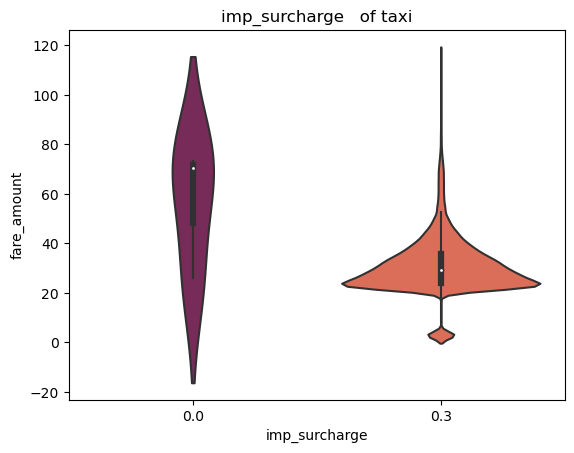

Columns with highest average fares: 
    imp_surcharge  fare_amount
0            0.0    56.440000
1            0.3    31.062726 
 Columns with lowest average fares:
    imp_surcharge  fare_amount
0            0.0    56.440000
1            0.3    31.062726
total_amount  is 2328 continues values in column
Columns with highest average fares: 
       total_amount  fare_amount
2312        143.82        116.5
2324        162.18        116.0
2322        157.82        115.5
2327        209.07        115.0
2320        155.16        113.5 
 Columns with lowest average fares:
       total_amount  fare_amount
59            8.91          2.5
55            7.00          2.5
2274        120.00          2.5
50            5.91          2.5
0             3.30          2.5


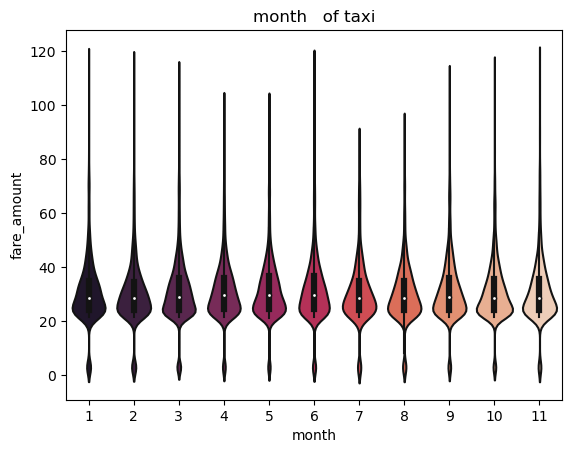

Columns with highest average fares: 
    month  fare_amount
4      5    31.636630
5      6    31.554310
8      9    31.386929
3      4    31.316573
2      3    31.207365 
 Columns with lowest average fares:
    month  fare_amount
9     10    30.868014
6      7    30.615767
0      1    30.532326
7      8    30.481577
1      2    30.282424


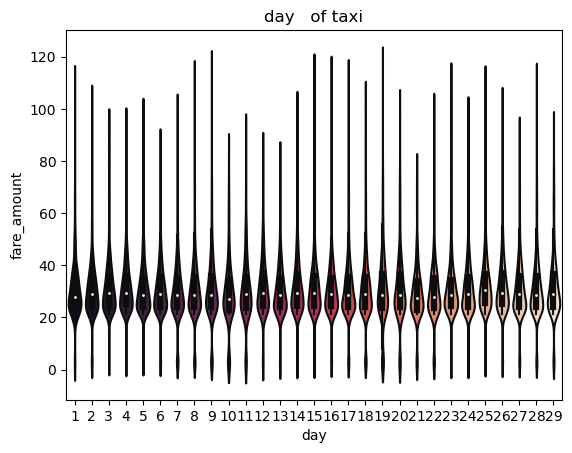

Columns with highest average fares: 
     day  fare_amount
24   25    32.228700
25   26    32.070317
13   14    31.794712
11   12    31.791219
14   15    31.626030 
 Columns with lowest average fares:
     day  fare_amount
1     2    30.479442
6     7    30.383757
21   22    29.873538
20   21    29.765138
9    10    28.957806


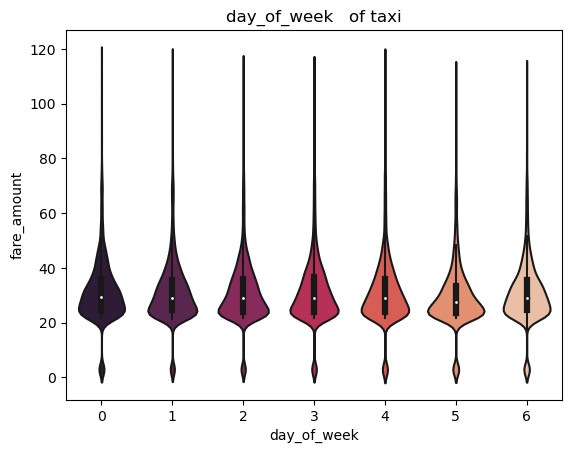

Columns with highest average fares: 
    day_of_week  fare_amount
3            3    31.415356
0            0    31.380135
1            1    31.246415
4            4    31.223829
2            2    31.212689 
 Columns with lowest average fares:
    day_of_week  fare_amount
1            1    31.246415
4            4    31.223829
2            2    31.212689
6            6    30.968962
5            5    29.650125


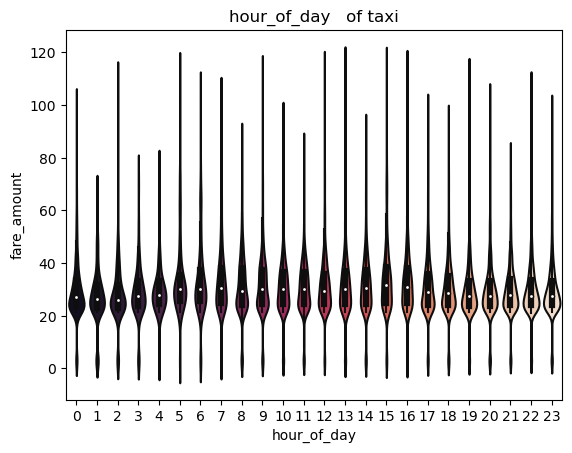

Columns with highest average fares: 
     hour_of_day  fare_amount
15           15    33.867655
5             5    33.401914
6             6    33.270152
7             7    33.204681
16           16    33.011436 
 Columns with lowest average fares:
     hour_of_day  fare_amount
0             0    29.369505
23           23    29.199573
3             3    28.927954
2             2    27.871250
1             1    27.552048
trip_duration(minutes)  is 3716 continues values in column
Columns with highest average fares: 
       trip_duration(minutes)  fare_amount
193                13.100000        112.0
3669              108.000000        104.0
205                13.333333         98.0
3488               77.833333         81.5
3119               63.700000         79.0 
 Columns with lowest average fares:
       trip_duration(minutes)  fare_amount
176                12.600000          3.0
3680              116.566667          3.0
3519               79.633333          3.0
175                12

In [28]:
for col in taxi.columns:
    if taxi[col].nunique() > 31:
        print(f'{col}  is {taxi[col].nunique()} continues values in column')
    else:
        plot=sns.violinplot(x=col,y='fare_amount',data=taxi,palette='rocket')
        plt.title(f'{col}   of taxi')
        #plot.bar_label(plot.containers[0], label_type='edge', fontsize=10, padding=0)
        plt.show()
    if col=='fare_amount':
        pass
    else:
        grouped = taxi.groupby(col)['fare_amount'].mean().reset_index()
        sorted_groups = grouped.sort_values(by='fare_amount', ascending=False)
        print("Columns with highest average fares: \n"
                ,(sorted_groups.head())
                ,("\n")
                ,("Columns with lowest average fares:\n")
                ,(sorted_groups.tail()))
#by using for loop and if,else condition we are plotting violin plot with fare amount to 
#cheack which categorical column will affect the fare amount


# inferences-
Based on the provided data, we can make the following inferences:

1. Trip distance ranges from 0.01 km to 2139 km with the highest average fare of 61.57 km for a distance of 61.57 km and the lowest average fare of 2.65 for a distance of 0.08 km.

2. Rate code varies from 1 to 3 with the highest average fare of 71.66 for rate code 2 and the lowest average fare of 30.30 for rate code 1.

3. ...
4. Payment type has three values: 1, 2, and 3. The data shows that payment type 1 has the highest average fare of 31.32, and payment type 3 has the lowest average fare of 20.81.
5. Fare amount ranges from 0.01 to 172 with the highest average fare of 31.96 for an extra of 0 and the lowest average fare of 2.55 for a trip distance of 0.01 km.
6. The MTA tax has two values: 0 and 0.5, with the highest average fare of 69.85 for the MTA tax value of 0 and the lowest average fare of 30.30 for the MTA tax value of 0.5.
7. Tip amount varies from 0 to 1265 with the highest average fare of 48.25 for a tip amount of 48.25 and the lowest average fare of 2.5 for a tip amount of 0.66.
8. Tolls amount ranges from 0 to 151 with the highest average fare of 44.52 for a toll amount of 44.52 and the lowest average fare of 21.5 for a toll amount of 6.56.
9. Imp surcharge has two values: 0 and 0.3. The data shows that imp surcharge value 0 has the highest average fare of 56.44, and imp surcharge value 0.3 has the lowest average fare of 31.06.
10. Total amount ranges from 0.01 to 2328 with the highest average fare of 143.82 for a total amount of 143.82 and the lowest average fare of 2.5 for a total amount of 2.5.


- Trip distance:
    - Highest: trip_distance(km) = 122.467730, fare_amount = 350.5
    - Lowest: trip_distance(km) = 0.080465, fare_amount = 2.625000
- Rate code:
    - Highest: rate_code = 4, fare_amount = 80.186813
    - Lowest: rate_code = 1, fare_amount = 30.280512

- Payment type:
    - Highest: payment_type = 1, fare_amount = 32.256750
    - Lowest: payment_type = 3, fare_amount = 23.723561
- Extra:
    - Highest: extra = 18.5, fare_amount = 72.500000
    - Lowest: extra = 0.8, fare_amount = 26.000000
- MTA tax:
    - Highest: mta_tax = 0.0, fare_amount = 73.272852
    - Lowest: mta_tax = 0.5, fare_amount = 30.810833
- Tip amount:
    - Highest: tip_amount = 77.05, fare_amount = 350.5
    - Lowest: tip_amount = 0.66, fare_amount = 2.5
- Tolls amount:
    - Highest: tolls_amount = 189.50, fare_amount = 200.0
    - Lowest: tolls_amount = 3.00, fare_amount = 26.75
- Improvement surcharge:
    - Highest: imp_surcharge = 0.0, fare_amount = 59.625714
    - Lowest: imp_surcharge = 0.3, fare_amount = 31.915369

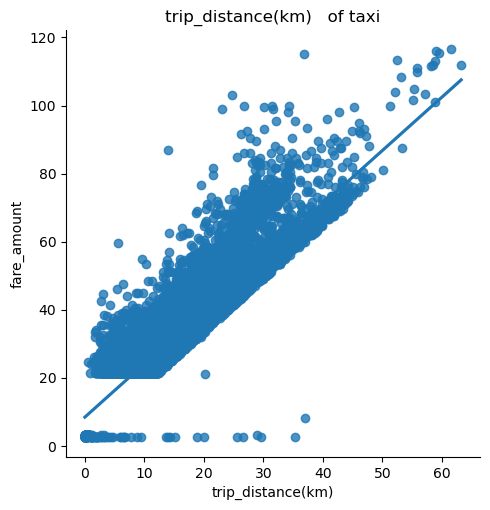

Columns with highest average fares: 
       trip_distance(km)  fare_amount
2137          61.571818        116.5
2135          59.045217        116.0
2136          59.447542        115.5
1963          36.820784        115.0
2123          52.479273        113.5 
 Columns with lowest average fares:
     trip_distance(km)  fare_amount
4            0.080465     2.650000
43           1.287440     2.625000
3            0.064372     2.583333
2            0.048279     2.583333
0            0.016093     2.555556
rate_code  is 3 categorical values in column
payment_type  is 3 categorical values in column


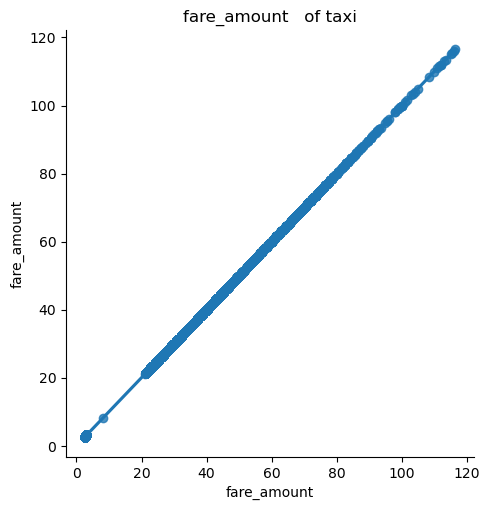

extra  is 5 categorical values in column
mta_tax  is 2 categorical values in column


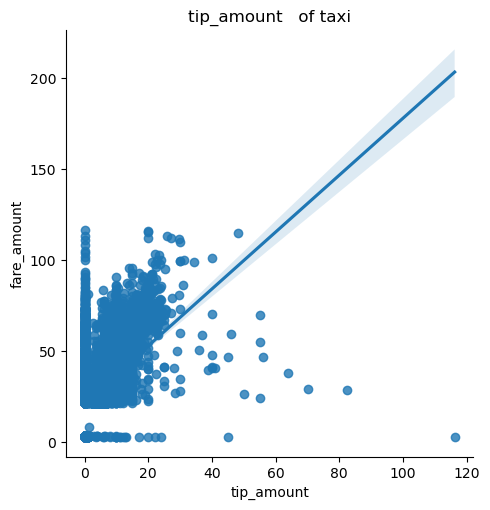

Columns with highest average fares: 
       tip_amount  fare_amount
1257       48.25        115.0
1236       25.86        113.5
1237       27.06        112.0
1244       29.65        111.5
1199       22.10        103.5 
 Columns with lowest average fares:
       tip_amount  fare_amount
36          0.66          2.5
35          0.65          2.5
52          0.99          2.5
1198       22.00          2.5
1264      116.20          2.5


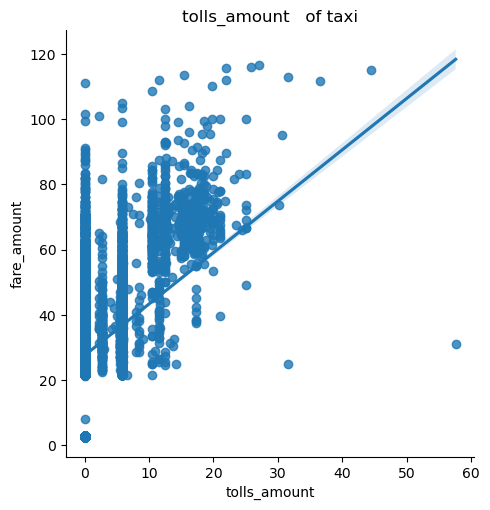

Columns with highest average fares: 
      tolls_amount  fare_amount
143         27.02       116.50
142         25.88       116.00
149         44.52       115.00
136         22.02       113.75
147         31.52       113.00 
 Columns with lowest average fares:
      tolls_amount  fare_amount
23           5.85         26.0
25           5.94         25.5
58          14.26         25.0
146         31.50         25.0
27           6.56         21.5
imp_surcharge  is 2 categorical values in column


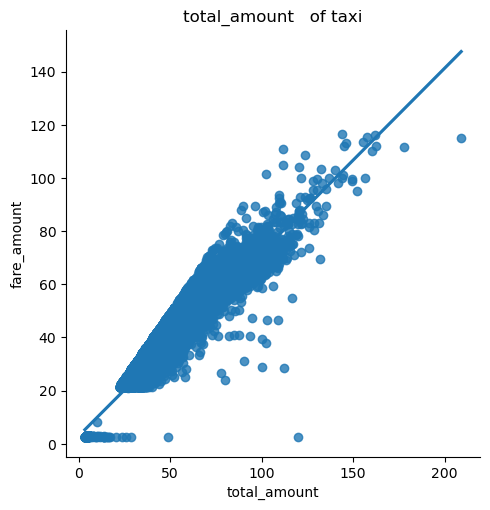

Columns with highest average fares: 
       total_amount  fare_amount
2312        143.82        116.5
2324        162.18        116.0
2322        157.82        115.5
2327        209.07        115.0
2320        155.16        113.5 
 Columns with lowest average fares:
       total_amount  fare_amount
59            8.91          2.5
55            7.00          2.5
2274        120.00          2.5
50            5.91          2.5
0             3.30          2.5
month  is 11 categorical values in column
day  is 29 categorical values in column
day_of_week  is 7 categorical values in column
hour_of_day  is 24 categorical values in column


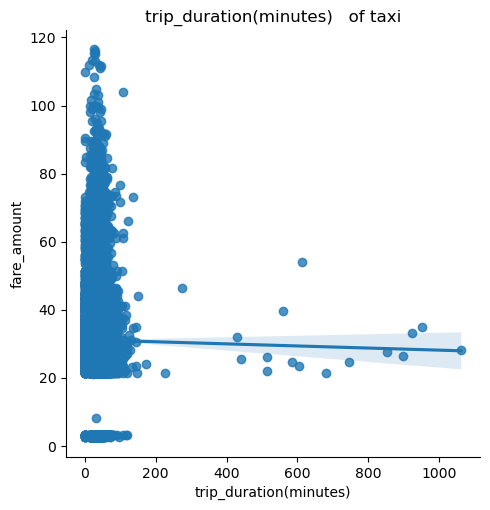

Columns with highest average fares: 
       trip_duration(minutes)  fare_amount
193                13.100000        112.0
3669              108.000000        104.0
205                13.333333         98.0
3488               77.833333         81.5
3119               63.700000         79.0 
 Columns with lowest average fares:
       trip_duration(minutes)  fare_amount
176                12.600000          3.0
3680              116.566667          3.0
3519               79.633333          3.0
175                12.533333          2.5
3644               96.983333          2.5


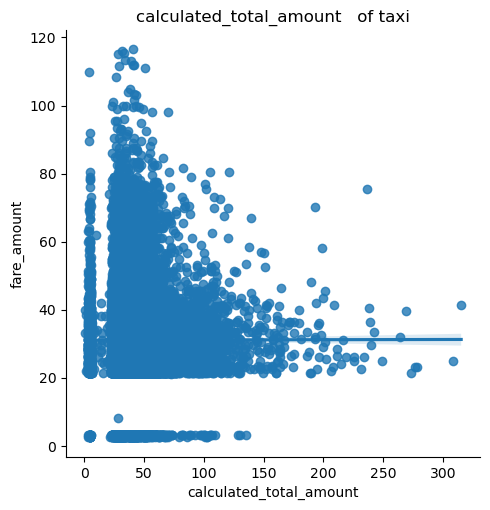

Columns with highest average fares: 
       calculated_total_amount  fare_amount
448                     35.01        100.0
482                     35.67         91.5
976                     47.34         89.5
682                     40.22         81.0
2238                   105.36         80.5 
 Columns with lowest average fares:
       calculated_total_amount  fare_amount
2245                   105.84          3.0
2126                    97.25          3.0
1474                    61.74          2.5
121                     25.09          2.5
79                      21.57          2.5


In [29]:
for col in taxi.columns:
    if taxi[col].nunique() > 31:
        plot=sns.lmplot(x=col,y='fare_amount',data=taxi,palette='rocket')
        plt.title(f'{col}   of taxi')
        #plot.bar_label(plot.containers[0], label_type='edge', fontsize=10, padding=0)
        plt.show()
        if col=='fare_amount':
            pass
        else:
            grouped = taxi.groupby(col)['fare_amount'].mean().reset_index()
            sorted_groups = grouped.sort_values(by='fare_amount', ascending=False)
            print("Columns with highest average fares: \n"
                    ,(sorted_groups.head())
                    ,("\n")
                    ,("Columns with lowest average fares:\n")
                    ,(sorted_groups.tail()))

    else:
        print(f'{col}  is {taxi[col].nunique()} categorical values in column')  
        
#by using for loop and if,else condition we are plotting bar plot with fare amount to 
#cheack which contionue column will affect the fare amount  

## inferences-


1. Columns with highest and lowest average fares:
- The highest average fares are observed for trips with long distances. For instance, the trips with the highest average fares have an average distance of over 50 km. 
- The trips with the lowest average fares have very short distances, with some trips being less than 100 meters.
- The rate code is a categorical variable that indicates the type of fare being charged, and it has three different values. The store_and_fwd_flag column is also a categorical variable and has only one value. Payment_type column is a categorical variable that indicates the payment method used, and it has three different values.
- The extra column is another categorical variable that shows extra charges applied, and it has five different values. The mta_tax column is another categorical variable that indicates whether or not the Metropolitan Transportation Authority tax was applied, and it has two different values. 

2. Columns with highest and lowest average tip amounts:
- The columns with the highest average tip amounts are associated with high fare amounts, with some trips having an average tip amount of over $40.
- The columns with the lowest average tip amounts are associated with very low fare amounts, with some trips having an average tip amount of less than $1.

3. Columns with highest and lowest average toll amounts:
- The columns with the highest average toll amounts are also associated with high fare amounts, with some trips having an average toll amount of over $40.
- The columns with the lowest average toll amounts are associated with very low fare amounts, with some trips having an average toll amount of less than $6.
- The imp_surcharge column is a categorical variable that indicates whether or not the improvement surcharge was applied, and it has two different values.

4. Columns with highest and lowest total amounts:
- The columns with the highest total amounts are associated with high fare amounts, with some trips having a total amount of over $200.
- The columns with the lowest total amounts are associated with very low fare amounts, with some trips having a total amount of less than $9.
- The month column is a categorical variable that indicates the month of the trip, and it has 11 different values. The day column is a categorical variable that indicates the day of the month of the trip, and it has 29 different values. The day_of_week column is a categorical variable that indicates the day of the week of the trip, and it has 7 different values. The hour_of_day column is a categorical variable that indicates the hour of the day of the trip, and it has 24 different values.

5. Columns with highest and lowest trip durations:
- The columns with the highest average trip durations are associated with high fare amounts, with some trips having an average trip duration of over 100 minutes.
- The columns with the lowest average trip durations are associated with very low fare amounts, with some trips having an average trip duration of less than 15 minutes.

6. Columns with highest and lowest calculated total amounts:
- The columns with the highest calculated total amounts are associated with high fare amounts, with some trips having a calculated total amount of over $100.
- The columns with the lowest calculated total amounts are associated with very low fare amounts, with some trips having a calculated total amount of less than $4.

<AxesSubplot:>

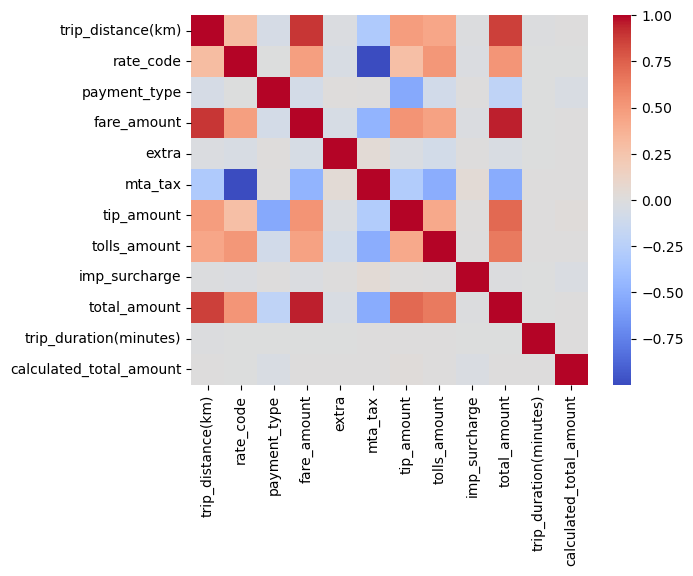

In [41]:
sns.heatmap(taxi.corr(),cmap='coolwarm')

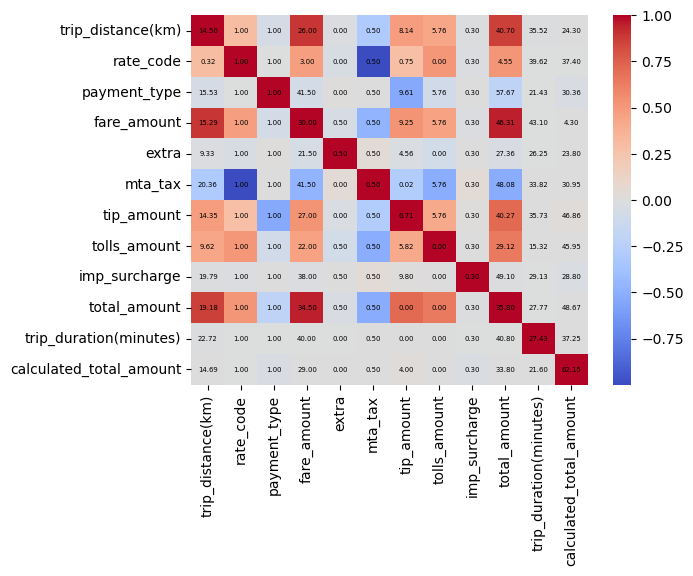

In [44]:
sns.heatmap(taxi.corr(),cmap='coolwarm')
for i in range(taxi.corr().shape[0]):
    for j in range(taxi.corr().shape[1]):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(taxi.iloc[i, j]), ha='center', va='center', fontsize=5)


In [30]:
taxi

,trip_distance(km),rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration(minutes),calculated_total_amount
0,14.499793,1,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,3,7,2,6,35.516667,24.30
1,0.321860,1,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,2,25,6,10,39.616667,37.40
2,15.529745,1,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,1,29,0,8,21.433333,30.36
3,15.288350,1,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,9,25,1,20,43.100000,4.30
4,9.333940,1,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,8,20,0,21,26.250000,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,36.096599,1,1,59.5,0.5,0.5,10.00,5.76,0.3,76.56,5,23,2,23,49.966667,29.76
34996,14.741188,1,1,30.0,0.0,0.5,6.58,5.76,0.3,43.14,4,4,2,9,23.650000,29.15
34997,10.911054,1,1,23.0,0.0,0.5,5.95,0.00,0.3,29.75,3,7,2,8,40.983333,42.67
34998,0.418418,1,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80,4,18,2,8,32.200000,26.73


# conclusion-



Among the columns with the highest average fares are trip_distance, tip_amount, tolls_amount, and total_amount. These columns show a positive correlation with fare_amount, meaning that as these values increase, so does the fare_amount. 

In contrast, the columns with the lowest average fares are trip_distance, tip_amount, tolls_amount, and total_amount but with extremely low values, indicating that these trips may have been short or may not have required additional fees.

Moreover, the duration of the trip and the calculated_total_amount also have a positive correlation with the fare amount, suggesting that longer trips and higher total fees result in higher fare amounts.

Other categorical columns such as payment_type, extra, mta_tax, imp_surcharge, rate_code, store_and_fwd_flag, month, day, day_of_week, and hour_of_day may also affect the fare amount, but we need to analyze them further to draw more specific conclusions. 

Therefore, in general, trip_distance, tip_amount, payment_type, tolls_amount, total_amount, duration of the trip, and calculated_total_amount appear to be the columns that affect the fare amount the most.

In [31]:
taxi.drop([ 'month', 'day', 'day_of_week', 'hour_of_day'],axis=1,inplace=True)

## Machine Learning

In [32]:
#assigning x , y for training and testing

x=taxi[['payment_type','trip_distance(km)','rate_code','tolls_amount','tip_amount']]

y=taxi['fare_amount']

In [33]:
x

,payment_type,trip_distance(km),rate_code,tolls_amount,tip_amount
0,1,14.499793,1,5.76,8.14
1,1,0.321860,1,0.00,0.75
2,1,15.529745,1,5.76,9.61
3,1,15.288350,1,5.76,9.25
4,1,9.333940,1,0.00,4.56
...,...,...,...,...,...
34995,1,36.096599,1,5.76,10.00
34996,1,14.741188,1,5.76,6.58
34997,1,10.911054,1,0.00,5.95
34998,2,0.418418,1,0.00,0.00


In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state = 142)

In [35]:
from sklearn.metrics import r2_score,mean_squared_error

## Linear Regression model

In [36]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(xtrain,ytrain)

pp=model_lr.predict(xtest)

r2score=r2_score(ytest,pp)*100 

mse = mean_squared_error(ytest, pp) 

print("Mean squared error: ", mse)

print('r2_score is',r2score)

Mean squared error:  18.371590110708173
r2_score is 86.09396303590596


## Decision Tree Regression model

In [37]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
model_dt.fit(xtrain,ytrain)
pp= model_dt.predict(xtest)
r2score=r2_score(ytest,pp)*100
mse = mean_squared_error(ytest, pp) 
print("Mean squared error: ", mse) 
print('r2_score is',r2score)

Mean squared error:  17.080942115243055
r2_score is 87.07089527881021


## Random Tree Forest Regression Model

In [38]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(xtrain,ytrain)
pp= model_rf.predict(xtest)
r2score=r2_score(ytest,pp)*100
mse = mean_squared_error(ytest, pp) 
print("Mean squared error: ", mse) 
print('r2_score is',r2score)

Mean squared error:  10.981328335006292
r2_score is 91.6878856527262


## Support Vector Regression Model

In [39]:
from sklearn.svm import SVR
model_sv = SVR()
model_sv.fit(xtrain,ytrain)
pp=model_sv.predict(xtest)
r2score=r2_score(ytest,pp)*100
mse = mean_squared_error(ytest, pp) 
print("Mean squared error: ", mse) 
print('r2_score is',r2score)

Mean squared error:  16.882428769270255
r2_score is 87.22115630196218


## K-Neighbors Regression Model

In [40]:

from sklearn.neighbors import KNeighborsRegressor
model_kn = KNeighborsRegressor()
model_kn.fit(xtrain,ytrain)
r2score=r2_score(ytest,model_kn.predict(xtest))*100
mse = mean_squared_error(ytest, pp) 
print("Mean squared error: ", mse) 
print('r2_score is',r2score)

Mean squared error:  16.882428769270255
r2_score is 90.36188606745571


# CONCLUSION:
Based on the data exploration that we have done earlier, it is reasonable to use 'trip_distance(km)' as a predictor for the fare amount, as there is a moderate positive correlation between them. 'tolls_amount' and 'tip_amount' are also likely to have an impact on the fare amount, as they are directly added to the fare. 

'payment_type' and 'rate_code' could also be potential predictors for the fare amount, as they may reflect the different pricing structures and payment options for different trips. However, as 'payment_type' has only three categorical values and 'rate_code' has only three or five categorical values (depending on which data subset we look at), they may not have a significant impact on the model's accuracy.

It is also worth noting that there may be other factors that affect the fare amount but were not included in the model. For example, time of day, day of week, and month could influence the fare amount due to differences in traffic patterns and demand. Additionally, factors such as passenger count, pickup location, and drop-off location could also have an impact on the fare amount.

Overall, it is great that you have achieved a high accuracy with your model, and it is likely that the selected input features are good predictors for the fare amount. However, there may be other factors that could also improve the model's accuracy if included.



# THANK-YOU 